#Company Data
About the data:
Let’s consider a Company dataset with around 10 variables and 400 records.
The attributes are as follows:
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this:

Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale.
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import train_test_split


In [30]:
#Import Dataset
data=pd.read_csv('/content/Company_Data.csv')
data

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

In [31]:
#Data Exploration
data.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [32]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [33]:
#Descriptive Analysis
data.shape

(400, 11)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [35]:
data.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

In [36]:
first_column=data.iloc[:,0]
median=first_column.median()
print('median:',median)

median: 7.49


In [37]:
result=[1 if value>median else 0 for value in first_column]
print(result)

[1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 

In [38]:
data.iloc[:,0]=[1 if value > median else 0 for value in first_column]
data.to_csv('modified_data.csv', index=False)

<ipython-input-38-d2b0bd5b6f3f>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,0]=[1 if value > median else 0 for value in first_column]


In [39]:
data

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0        1        138      73           11         276    120       Bad   42   
1        1        111      48           16         260     83      Good   65   
2        1        113      35           10         269     80    Medium   59   
3        0        117     100            4         466     97    Medium   55   
4        0        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395      1        138     108           17         203    128      Good   33   
396      0        139      23            3          37    120    Medium   55   
397      0        162      26           12         368    159    Medium   40   
398      0        100      79            7         284     95       Bad   50   
399      1        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

In [40]:
data=pd.get_dummies(data,columns=['ShelveLoc', 'Urban', 'US'])
data

Sales  CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        1        138      73           11         276    120   42         17   
1        1        111      48           16         260     83   65         10   
2        1        113      35           10         269     80   59         12   
3        0        117     100            4         466     97   55         14   
4        0        141      64            3         340    128   38         13   
..     ...        ...     ...          ...         ...    ...  ...        ...   
395      1        138     108           17         203    128   33         14   
396      0        139      23            3          37    120   55         11   
397      0        162      26           12         368    159   40         18   
398      0        100      79            7         284     95   50         12   
399      1        134      37            0          27    120   49         16   

     ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0                1               0                 0         0          1   
1                0               1                 0         0          1   
2                0               0                 1         0          1   
3                0               0                 1         0          1   
4                1               0                 0         0          1   
..             ...             ...               ...       ...        ...   
395              0               1                 0         0          1   
396              0               0                 1         1          0   
397              0               0                 1         0          1   
398              1               0                 0         0          1   
399              0               1                 0         0          1   

     US_No  US_Yes  
0        0       1  
1        0       1  
2        0       1  
3        0       1  
4        1       0  
..     ...     ...  
395      0       1  
396      0       1  
397      0       1  
398      0       1  
399      0       1  

[400 rows x 15 columns]

In [41]:
array=data.values
x=array[:,1:10]
y=array[:,0]

In [42]:
cart = DecisionTreeClassifier()

model = BaggingClassifier(base_estimator=cart, n_estimators=100, random_state=7)

results = cross_val_score(model, x,y, cv=5)

print(results.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.7975


In [43]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=123)

In [44]:
bg_clf=BaggingClassifier(base_estimator=cart, n_estimators=100, random_state=7)
bg_clf.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=7)

In [45]:
y_pred_test=bg_clf.predict(x_test)

In [46]:
tree_train_pred=pd.DataFrame({'actual':y_test,'pred':y_pred_test})
tree_train_pred

actual  pred
0        1     1
1        1     1
2        1     1
3        1     1
4        1     1
..     ...   ...
75       1     0
76       0     0
77       1     1
78       1     0
79       0     0

[80 rows x 2 columns]

<Figure size 1800x900 with 0 Axes>

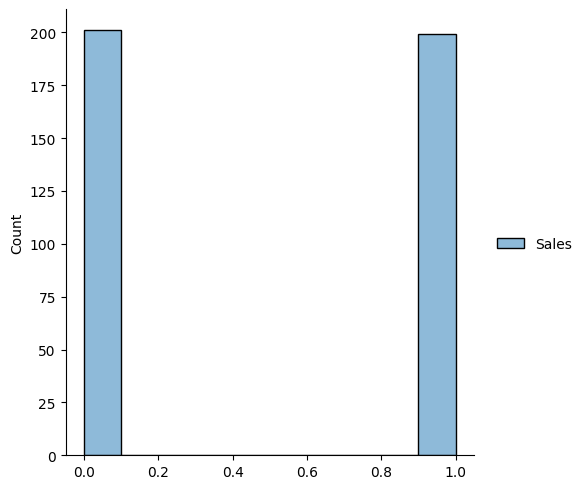

In [47]:
#Data Visualization
plt.figure(figsize=(18,9))
sns.displot(data.iloc[:,:1])
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable h

<Figure size 800x800 with 0 Axes>

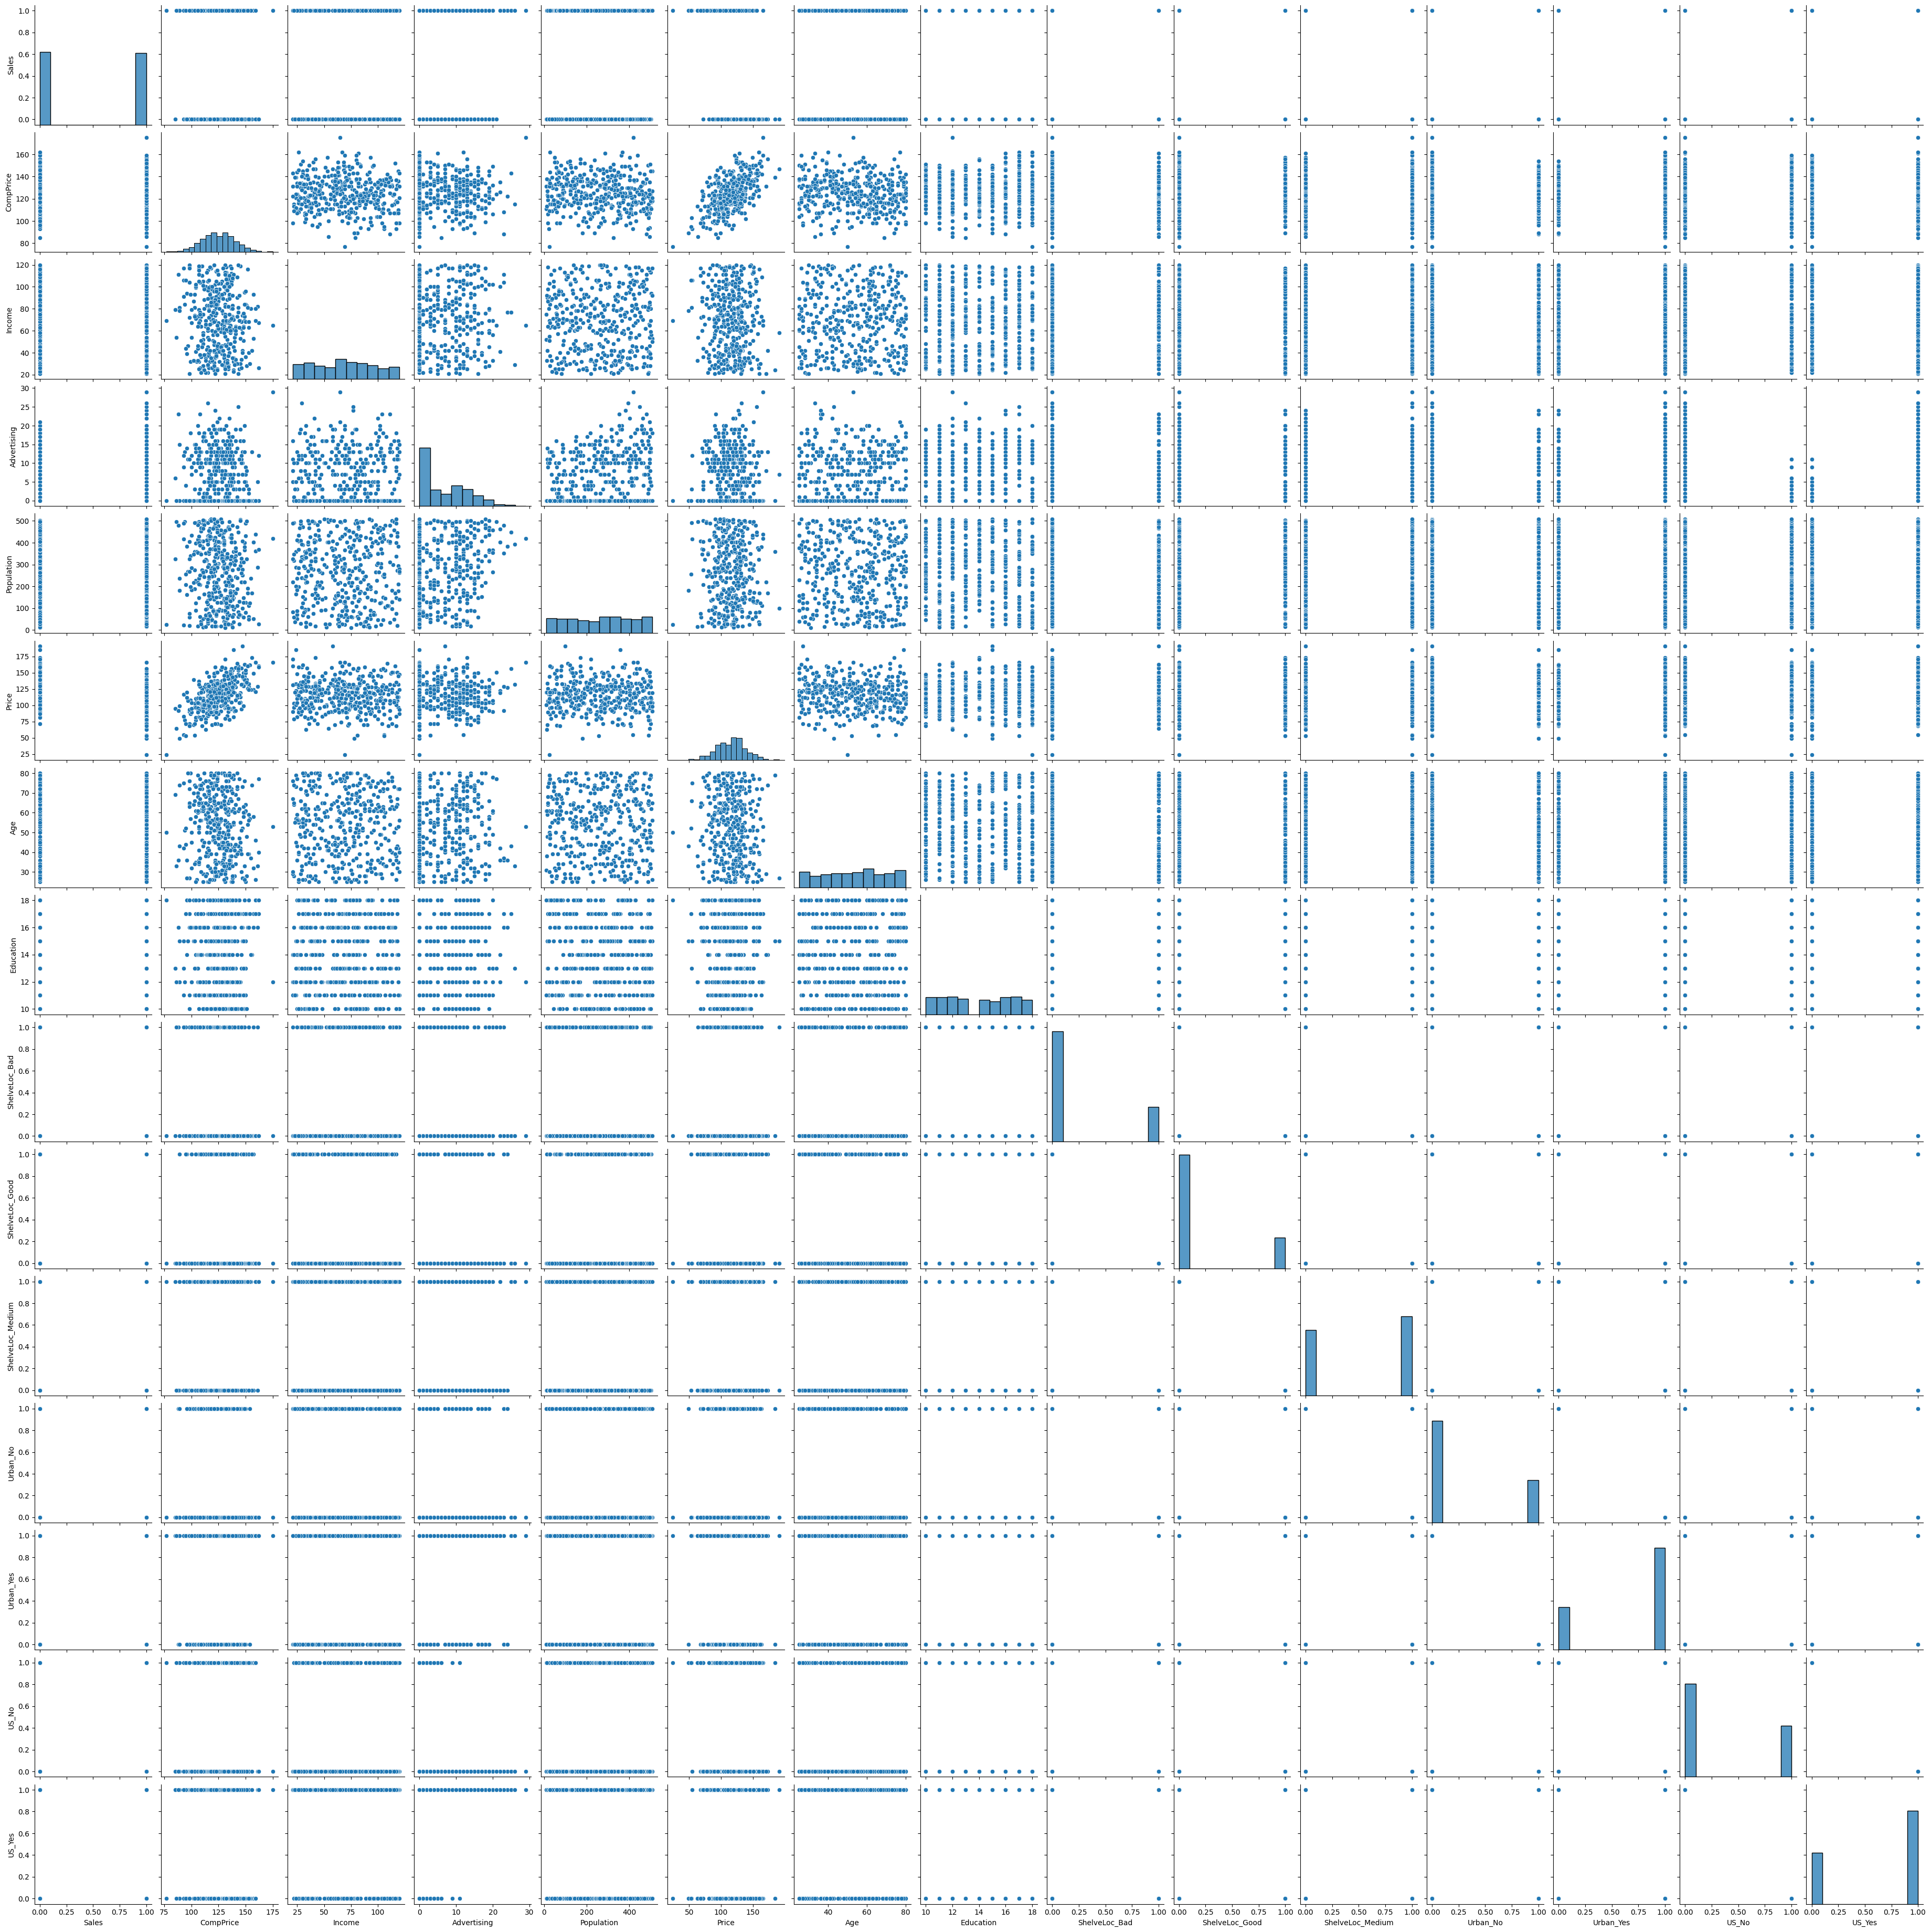

In [28]:
plt.figure(figsize=(8,8))
sns.pairplot(data,palette='coolwarm')
plt.show()

<Axes: >

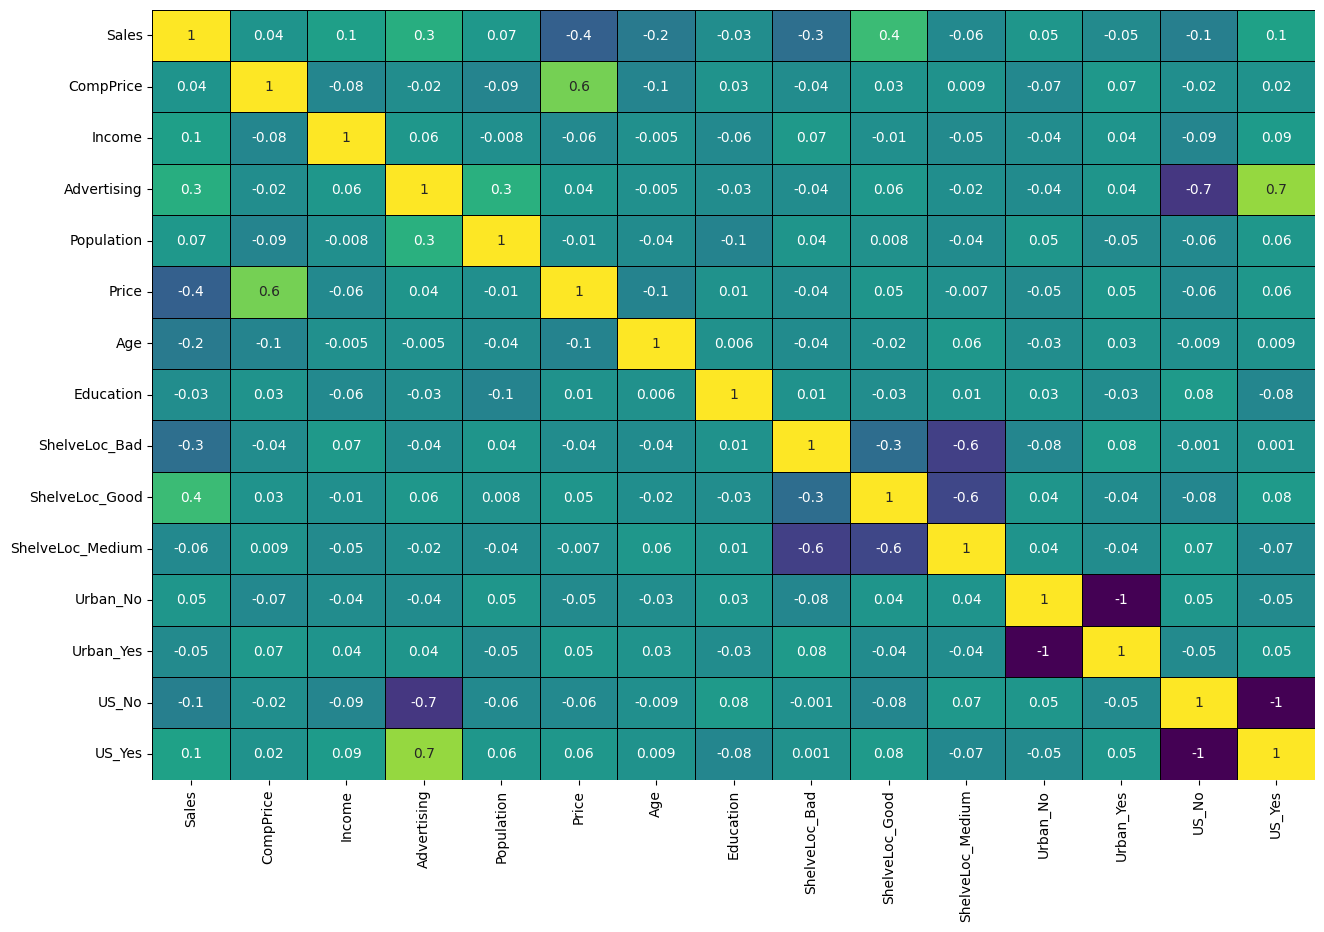

In [48]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black')

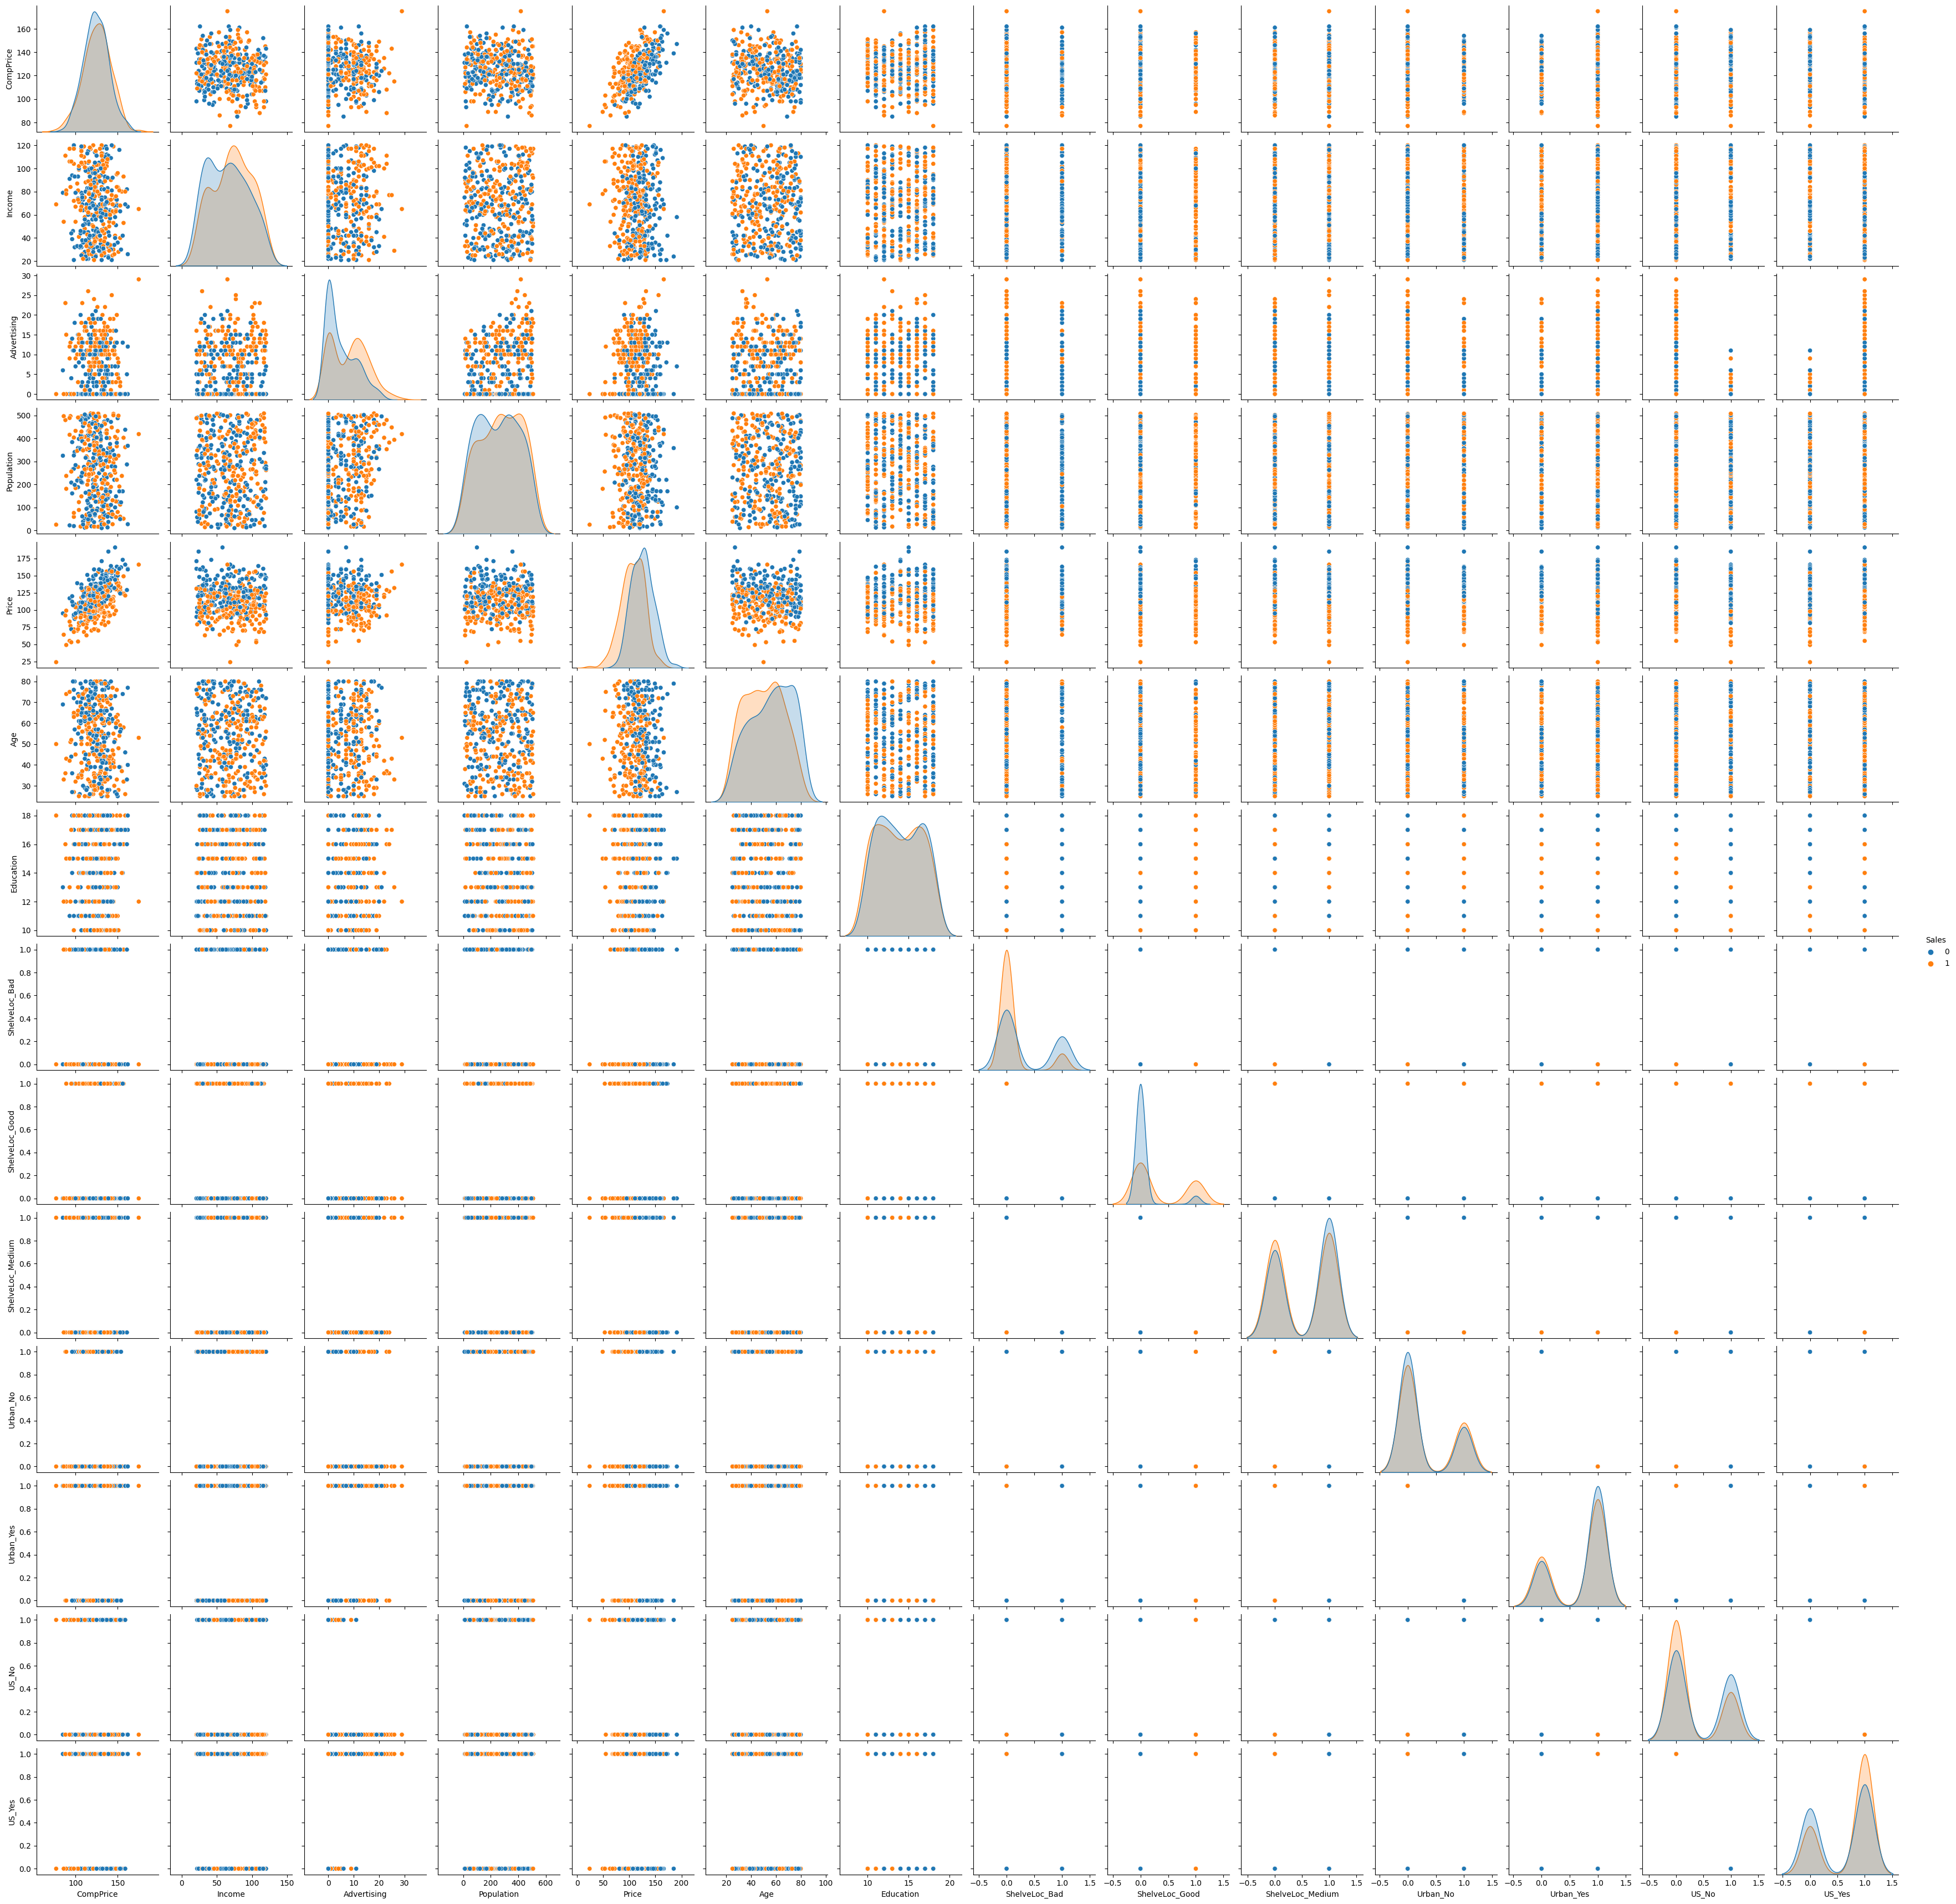

In [49]:
sns.pairplot(data=data,hue="Sales")

<Axes: xlabel='Sales', ylabel='count'>

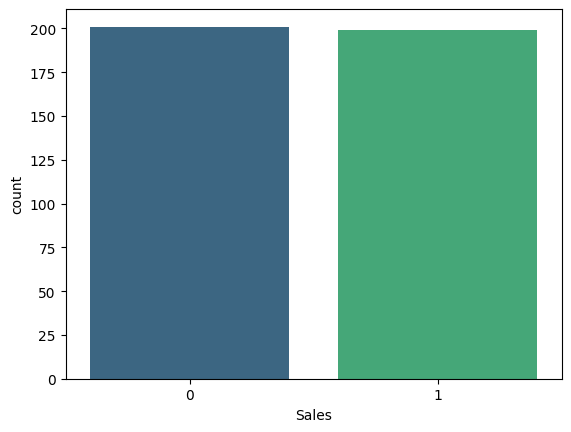

In [50]:
sns.countplot(x='Sales',data=data,palette='viridis',order=data['Sales'].value_counts().index)


<Axes: >

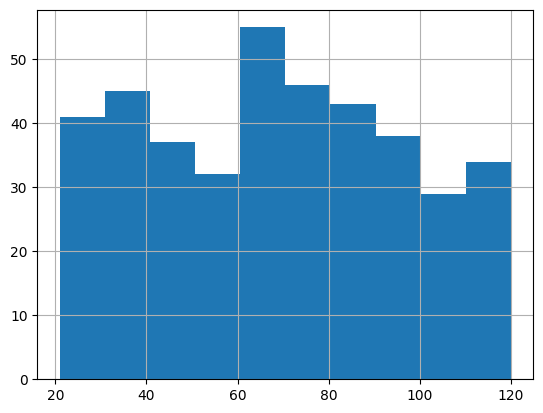

In [51]:
data['Income'].hist()

     Sales  CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        1        138      73           11         276    120   42         17   
1        1        111      48           16         260     83   65         10   
2        1        113      35           10         269     80   59         12   
3        0        117     100            4         466     97   55         14   
4        0        141      64            3         340    128   38         13   
..     ...        ...     ...          ...         ...    ...  ...        ...   
395      1        138     108           17         203    128   33         14   
396      0        139      23            3          37    120   55         11   
397      0        162      26           12         368    159   40         18   
398      0        100      79            7         284     95   50         12   
399      1        134      37            0          27    120   49         16   

     ShelveLoc_Bad  ShelveL

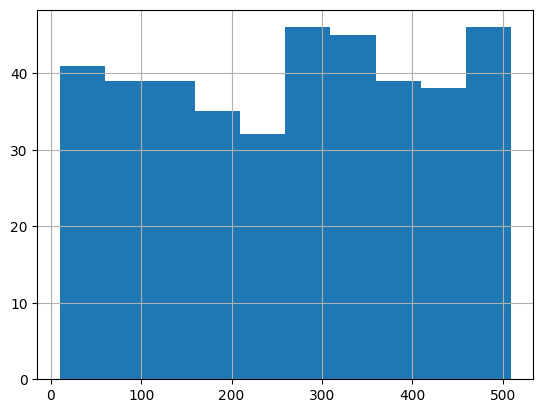

In [52]:
data['Population'].hist()
print(data)

In [53]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

x=array[:,1:10]
y=array[:,0]

model=RandomForestClassifier(n_estimators=100,max_features=3)
result1=cross_val_score(model,x,y,cv=10)
print(result1.mean())

0.8025


In [54]:
model.fit(x_train,y_train)

RandomForestClassifier(max_features=3)

In [55]:
preds=model.predict(x_test)

In [56]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82        33
           1       0.93      0.79      0.85        47

    accuracy                           0.84        80
   macro avg       0.84      0.85      0.84        80
weighted avg       0.85      0.84      0.84        80



In [57]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn import metrics

params_grid = {"n_estimators": [200, 250, 400],
    "max_depth": [5, 7, 9, 10],
    "min_samples_leaf": range(2, 9),
    "min_samples_split": [4, 8, 10, 12, 15, 18],
    "max_leaf_nodes": range(4, 8)}

dt_estimator = RandomizedSearchCV(RandomForestClassifier(random_state=0), param_distributions=params_grid, cv=10, random_state=0, n_jobs=-1 )

dt_estimator.fit(x_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 7, 9, 10],
                                        'max_leaf_nodes': range(4, 8),
                                        'min_samples_leaf': range(2, 9),
                                        'min_samples_split': [4, 8, 10, 12, 15,
                                                              18],
                                        'n_estimators': [200, 250, 400]},
                   random_state=0)

In [58]:
dt_estimator.best_params_

{'n_estimators': 250,
 'min_samples_split': 10,
 'min_samples_leaf': 6,
 'max_leaf_nodes': 6,
 'max_depth': 7}

In [59]:
pred1=dt_estimator.predict(x_test)

In [60]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.64      0.85      0.73        33
           1       0.86      0.66      0.75        47

    accuracy                           0.74        80
   macro avg       0.75      0.75      0.74        80
weighted avg       0.77      0.74      0.74        80

